In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [93]:
df16=pd.read_csv("C://Users//Happy//Desktop//capstone//singapore resale//15-16.csv")
df16.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [94]:
df17=pd.read_csv("C://Users//Happy//Desktop//capstone//singapore resale//after 17.csv")
df17.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
183247,2024-07,YISHUN,5 ROOM,674B,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,93 years 06 months,650000.0
183248,2024-07,YISHUN,5 ROOM,342A,YISHUN RING RD,13 TO 15,117.0,Premium Apartment,2016,90 years 07 months,790000.0
183249,2024-07,YISHUN,5 ROOM,297,YISHUN ST 20,01 TO 03,112.0,Improved,2000,75 years 04 months,615000.0
183250,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,63 years 04 months,830800.0
183251,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 03 months,770000.0


In [95]:
df17["remaining_lease"]

0         61 years 04 months
1         60 years 07 months
2         62 years 05 months
3          62 years 01 month
4         62 years 05 months
                 ...        
183247    93 years 06 months
183248    90 years 07 months
183249    75 years 04 months
183250    63 years 04 months
183251    60 years 03 months
Name: remaining_lease, Length: 183252, dtype: object

In [96]:
df17["remaining_lease"]=df17["remaining_lease"].str.replace(r'years|months|month', '', regex=True).str.strip()

In [97]:
df17["remaining_lease"]

0         61  04
1         60  07
2         62  05
3         62  01
4         62  05
           ...  
183247    93  06
183248    90  07
183249    75  04
183250    63  04
183251    60  03
Name: remaining_lease, Length: 183252, dtype: object

In [98]:
df=pd.concat([df16,df17],axis=0)
df.reset_index(drop= True, inplace= True)

In [99]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [100]:
df.count()

month                  220405
town                   220405
flat_type              220405
block                  220405
street_name            220405
storey_range           220405
floor_area_sqm         220405
flat_model             220405
lease_commence_date    220405
remaining_lease        220405
resale_price           220405
dtype: int64

In [101]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [102]:
df["remaining_lease"]

0             70
1             65
2             64
3             63
4             64
           ...  
220400    93  06
220401    90  07
220402    75  04
220403    63  04
220404    60  03
Name: remaining_lease, Length: 220405, dtype: object

In [103]:
slice_values= []
for i in df["remaining_lease"].astype(str):
    n= i.split("  ")
    slice_values.append(n)

In [104]:
df1= pd.DataFrame(slice_values,columns=["remaining_year", "remaining_month"])

In [105]:
df1

,remaining_year,remaining_month
0,70,None
1,65,None
2,64,None
3,63,None
4,64,None
...,...,...
220400,93,06
220401,90,07
220402,75,04
220403,63,04


In [106]:
data = pd.concat([df,df1],axis=1)

In [107]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_year,remaining_month
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,70,None
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,65,None
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,64,None
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,63,None
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,64,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220400,2024-07,YISHUN,5 ROOM,674B,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,93 06,650000.0,93,06
220401,2024-07,YISHUN,5 ROOM,342A,YISHUN RING RD,13 TO 15,117.0,Premium Apartment,2016,90 07,790000.0,90,07
220402,2024-07,YISHUN,5 ROOM,297,YISHUN ST 20,01 TO 03,112.0,Improved,2000,75 04,615000.0,75,04
220403,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,63 04,830800.0,63,04


In [108]:
data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
remaining_year          object
remaining_month         object
dtype: object

In [109]:
data.drop(columns=["remaining_lease"],inplace= True)
data["remaining_year"]= data["remaining_year"].astype(int)
data["remaining_month"]= data["remaining_month"].fillna(0).astype(int)

In [110]:
data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_year           int32
remaining_month          int32
dtype: object

In [111]:
data["month"] = pd.to_datetime(data["month"], format="%Y-%m")
data["year"]= data["month"].dt.year
data["month"]= data["month"].dt.month

In [112]:
data[["lower_storey", "upper_storey"]]= data["storey_range"].str.split(" TO ",expand=True)

In [113]:
data.drop(columns=["storey_range"],inplace= True)

In [114]:
data.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_year,remaining_month,year,lower_storey,upper_storey
0,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,60.0,Improved,1986,255000.0,70,0,2015,07,09
1,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,68.0,New Generation,1981,275000.0,65,0,2015,01,03
2,1,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,69.0,New Generation,1980,285000.0,64,0,2015,01,03
3,1,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,68.0,New Generation,1979,290000.0,63,0,2015,01,03
4,1,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,68.0,New Generation,1980,290000.0,64,0,2015,07,09


In [115]:
data["upper_storey"]= data["upper_storey"].astype(int)
data["lower_storey"]= data["lower_storey"].astype(int)

In [116]:
data.dtypes

month                    int32
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_year           int32
remaining_month          int32
year                     int32
lower_storey             int32
upper_storey             int32
dtype: object

In [117]:
data.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,remaining_year,remaining_month,year,lower_storey,upper_storey
count,220405.000000,220405.000000,220405.000000,2.204050e+05,220405.000000,220405.000000,220405.000000,220405.000000,220405.000000
mean,6.493659,97.113336,1995.177886,4.886835e+05,74.093895,4.610431,2019.650498,7.660979,9.660979
std,3.388952,24.056815,13.707272,1.692375e+05,13.501363,3.779953,2.706028,5.844139,5.844139
min,1.000000,31.000000,1966.000000,1.400000e+05,41.000000,0.000000,2015.000000,1.000000,3.000000
25%,4.000000,81.000000,1985.000000,3.650000e+05,63.000000,1.000000,2017.000000,4.000000,6.000000
50%,6.000000,93.000000,1995.000000,4.550000e+05,74.000000,4.000000,2020.000000,7.000000,9.000000
75%,9.000000,112.000000,2005.000000,5.800000e+05,85.000000,8.000000,2022.000000,10.000000,12.000000
max,12.000000,280.000000,2020.000000,1.588000e+06,97.000000,11.000000,2024.000000,49.000000,51.000000


Ecoding the categorical column

In [118]:
flatmodel=data["flat_model"].unique()
flattype=data["flat_type"].unique()
town=data["town"].unique()
print(flatmodel)
print(flattype)
print(town)

['Improved' 'New Generation' 'Model A' 'Standard' 'Simplified'
 'Premium Apartment' 'Maisonette' 'Apartment' 'Model A2' 'Type S1'
 'Type S2' 'Adjoined flat' 'Terrace' 'DBSS' 'Model A-Maisonette'
 'Premium Maisonette' 'Multi Generation' 'Premium Apartment Loft'
 'Improved-Maisonette' '2-room' '3Gen']
['3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']


In [119]:
data["flat_model"]= OrdinalEncoder().fit_transform(data[["flat_model"]])
data["flat_type"]= OrdinalEncoder().fit_transform(data[["flat_type"]])
data["town"]=LabelEncoder().fit_transform(data["town"])

In [120]:
encoded_fm=data["flat_model"].unique()
encoded_ft=data["flat_type"].unique()
encoded_town=data["town"].unique()

print(encoded_fm)
print(encoded_ft)
print(encoded_town)

[ 5. 12.  8. 17. 16. 13.  7.  3. 10. 19. 20.  2. 18.  4.  9. 15. 11. 14.
  6.  0.  1.]
[2. 3. 4. 1. 5. 0. 6.]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [121]:
data.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_year,remaining_month,year,lower_storey,upper_storey
0,1,0,2.0,174,ANG MO KIO AVE 4,60.0,5.0,1986,255000.0,70,0,2015,7,9
1,1,0,2.0,541,ANG MO KIO AVE 10,68.0,12.0,1981,275000.0,65,0,2015,1,3
2,1,0,2.0,163,ANG MO KIO AVE 4,69.0,12.0,1980,285000.0,64,0,2015,1,3
3,1,0,2.0,446,ANG MO KIO AVE 10,68.0,12.0,1979,290000.0,63,0,2015,1,3
4,1,0,2.0,557,ANG MO KIO AVE 10,68.0,12.0,1980,290000.0,64,0,2015,7,9


In [122]:
data = data.drop(columns=['street_name', 'block'])

In [123]:
data= data[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 
       'upper_storey', 'lower_storey', 'remaining_year','remaining_month',
       'lease_commence_date', 'resale_price']]

In [124]:
data.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,upper_storey,lower_storey,remaining_year,remaining_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,9,7,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,3,1,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,3,1,64,0,1980,285000.0
3,2015,1,0,2.0,68.0,12.0,3,1,63,0,1979,290000.0
4,2015,1,0,2.0,68.0,12.0,9,7,64,0,1980,290000.0


In [125]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,220405.0,2019.650498,2.706028,2015.0,2017.0,2020.0,2022.0,2024.0
month,220405.0,6.493659,3.388952,1.0,4.0,6.0,9.0,12.0
town,220405.0,13.889449,7.956797,0.0,8.0,14.0,21.0,25.0
flat_type,220405.0,3.120147,0.919303,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,220405.0,97.113336,24.056815,31.0,81.0,93.0,112.0,280.0
flat_model,220405.0,8.689599,3.644503,0.0,5.0,8.0,12.0,20.0
upper_storey,220405.0,9.660979,5.844139,3.0,6.0,9.0,12.0,51.0
lower_storey,220405.0,7.660979,5.844139,1.0,4.0,7.0,10.0,49.0
remaining_year,220405.0,74.093895,13.501363,41.0,63.0,74.0,85.0,97.0
remaining_month,220405.0,4.610431,3.779953,0.0,1.0,4.0,8.0,11.0


In [126]:
x=data[['year','month','town', 'flat_type', 'floor_area_sqm', 'flat_model', 
       'upper_storey', 'lower_storey', 'remaining_year','remaining_month','resale_price']].corr()

<Axes: >

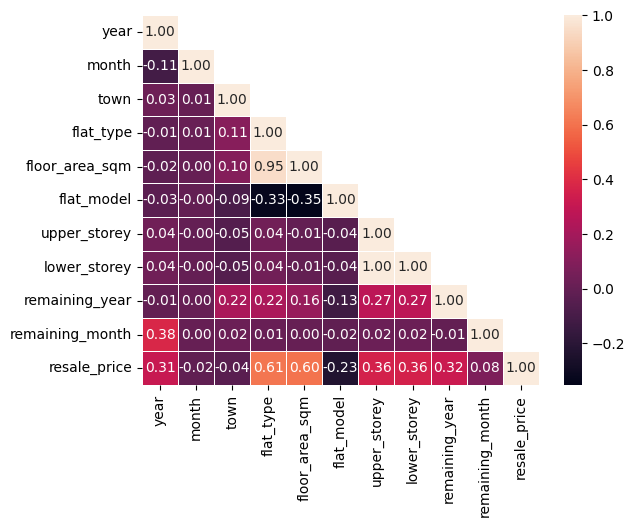

In [127]:
sns.heatmap(x, annot=True,mask=np.triu(x.corr(),+1),fmt=".2f",linewidths=0.6)


Positively correlated with floor_area_sqm (0.61), indicating that larger floor area tends to be associated with higher resale prices.
Positively correlated with upper_storey (0.36) and lower_storey (0.36), indicating higher resale prices for higher floors.
Negatively correlated with year (-0.31), suggesting that resale prices tend to decrease with newer construction years.

In [128]:
def out_skew(df,column):
    #skewness
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.kdeplot(df[column])
    plt.title("Skewness of"+" "+column)

    #outlier
    plt.subplot(1,2,2)
    sns.boxplot(df[column])
    plt.title("outlier of"+" "+column)


    plt.tight_layout()
    plt.show()

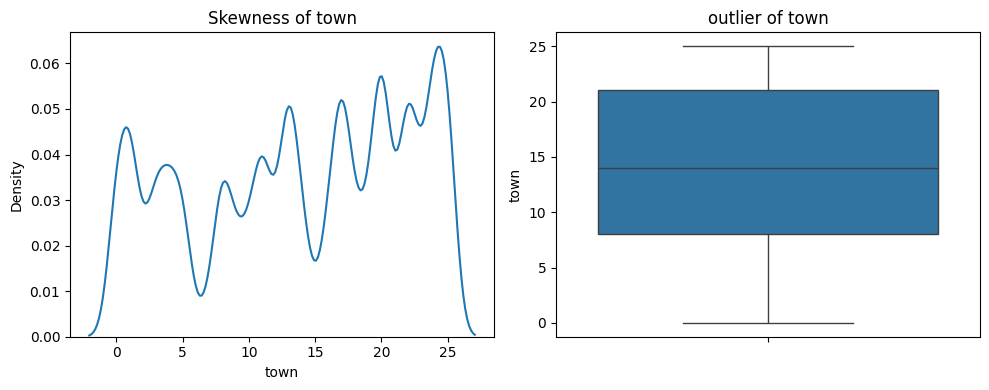

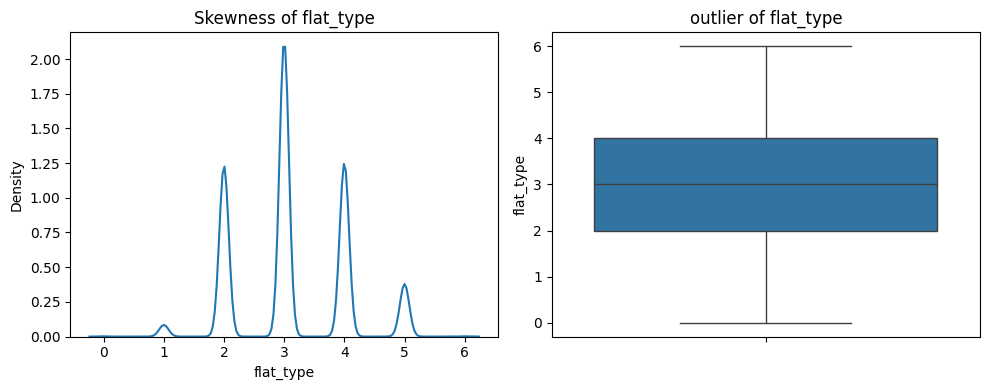

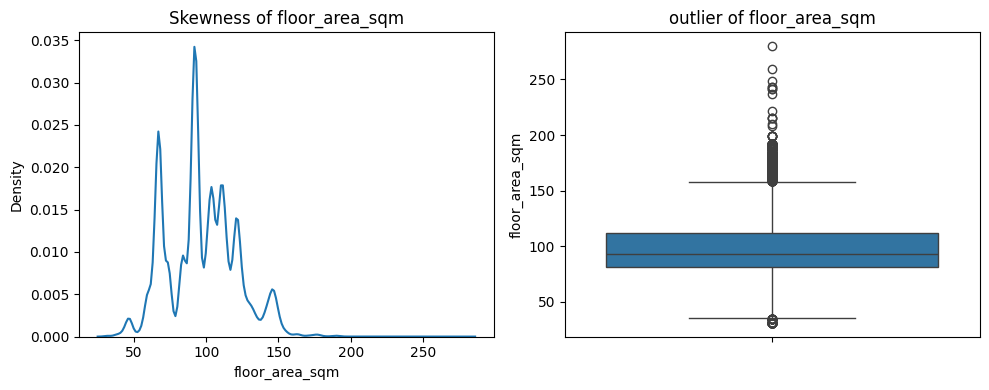

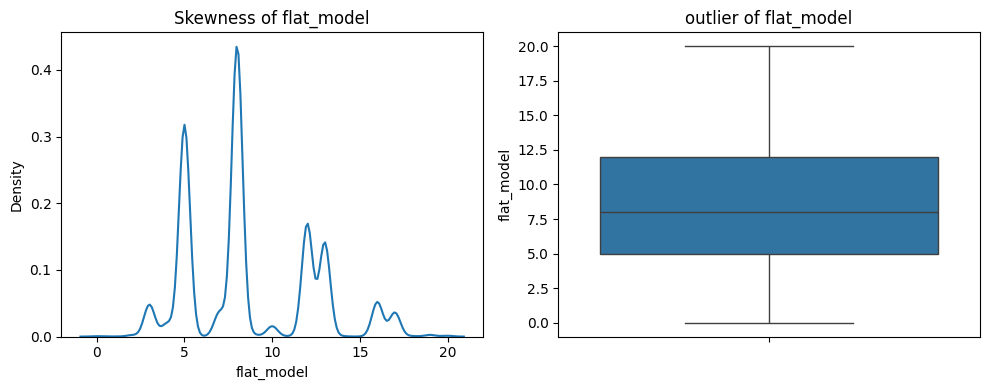

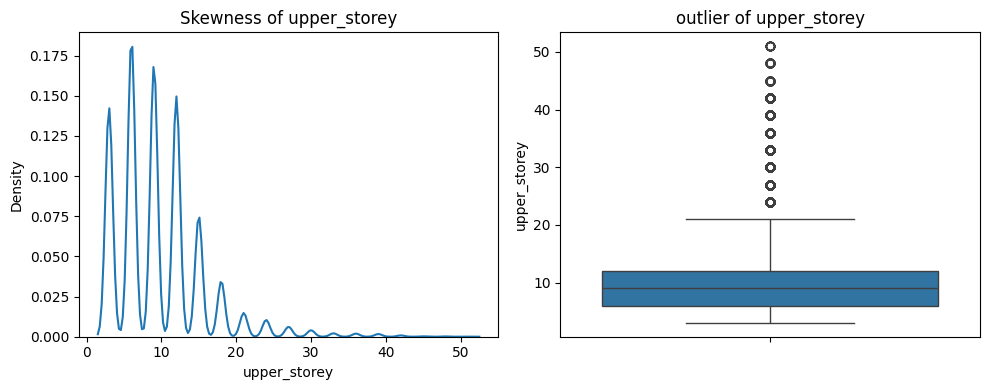

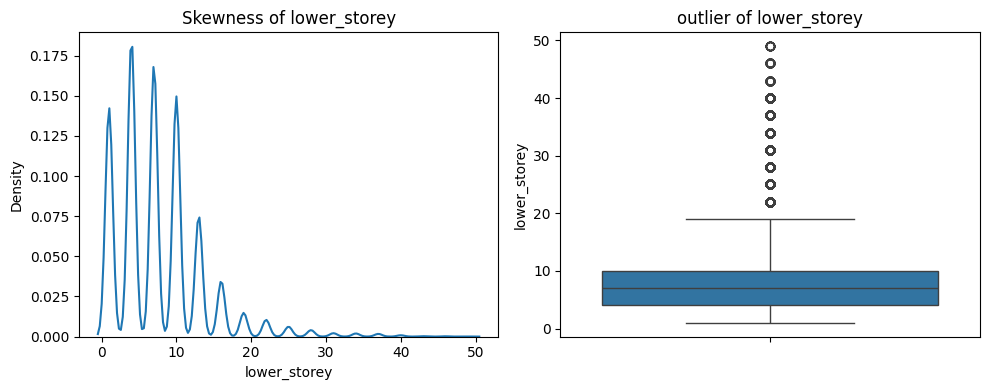

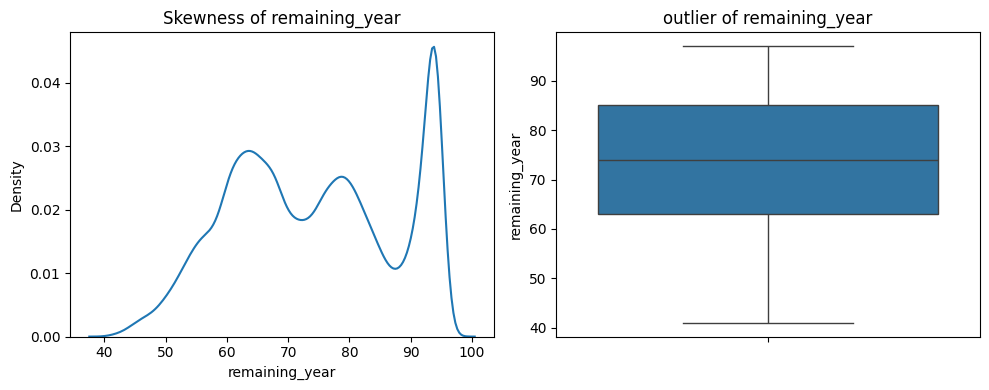

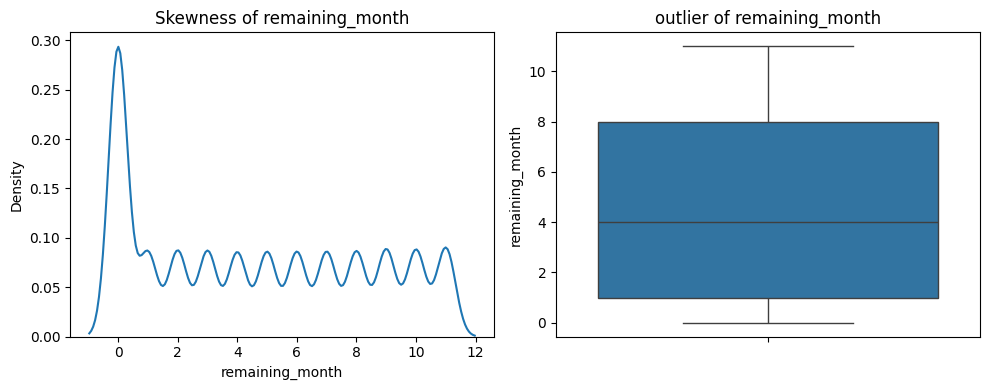

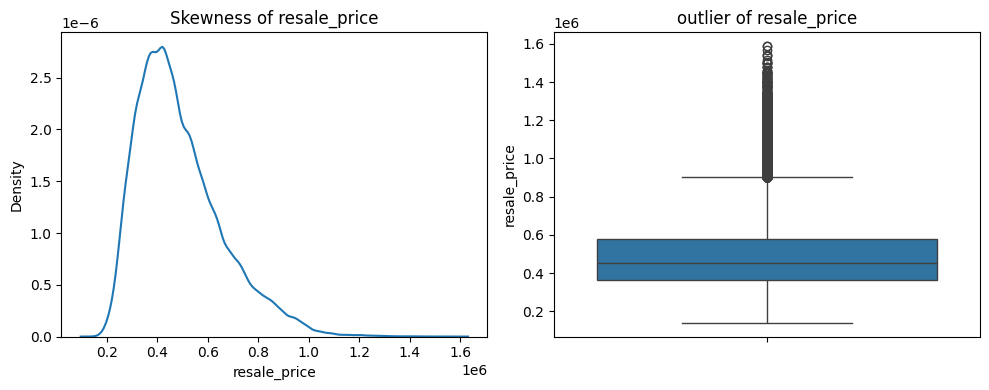

In [129]:
columns=['town', 'flat_type', 'floor_area_sqm', 'flat_model', 
       'upper_storey', 'lower_storey', 'remaining_year','remaining_month','resale_price']
  
for i in columns:
  out_skew(data,i)

In [130]:
data[columns].skew()

town              -0.273654
flat_type          0.209469
floor_area_sqm     0.265368
flat_model         0.571046
upper_storey       1.618943
lower_storey       1.618943
remaining_year     0.003855
remaining_month    0.217508
resale_price       1.012254
dtype: float64

In [131]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [132]:
data["upper_storey"]= np.log(data["upper_storey"])
data["lower_storey"]= np.log(data["lower_storey"])
data["resale_price"]= np.log(data["resale_price"])

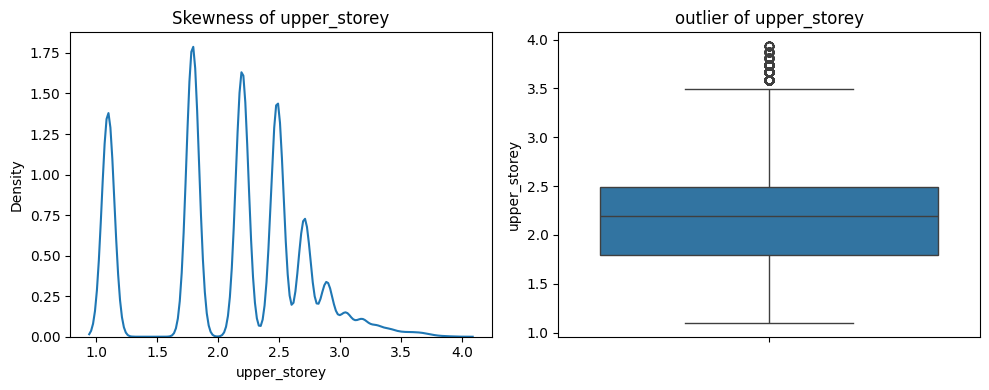

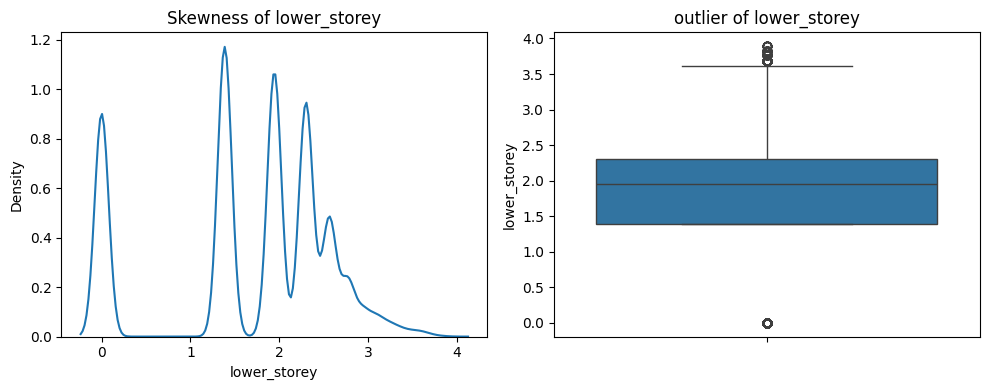

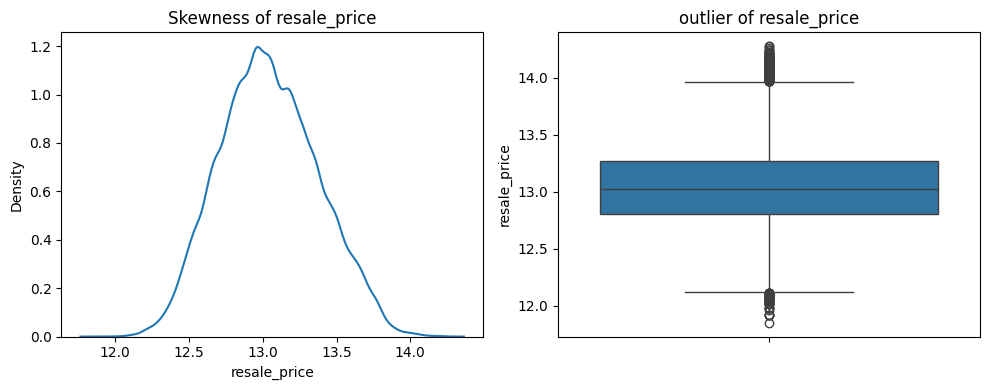

In [133]:
columns=['upper_storey', 'lower_storey','resale_price']
  
for i in columns:
  out_skew(data,i)

In [134]:
data[columns].skew()

upper_storey   -0.179917
lower_storey   -0.674830
resale_price    0.152099
dtype: float64

In [135]:
def wisker(df,column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    iqr= q3-q1
    lw= q1-1.5*iqr
    uw= q3+1.5*iqr

    df[column]= df[column].clip(lw, uw)

In [136]:
outlier_columns= ['floor_area_sqm', 'flat_model', 
       'upper_storey', 'lower_storey','resale_price']
for k in outlier_columns:
  wisker(data,k)

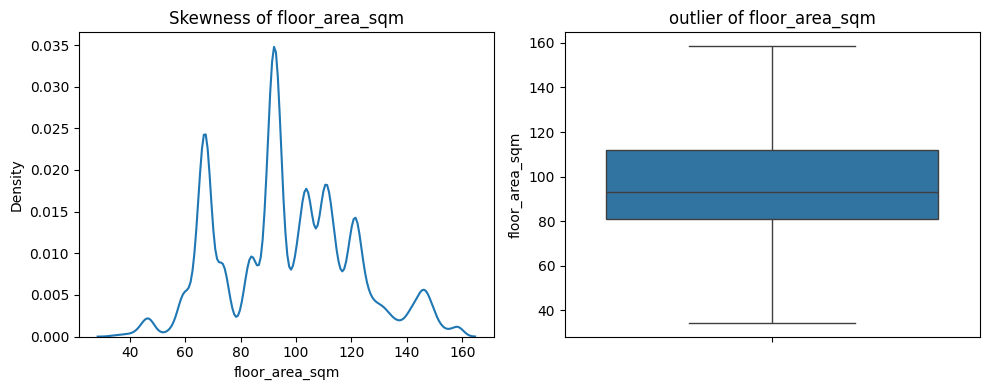

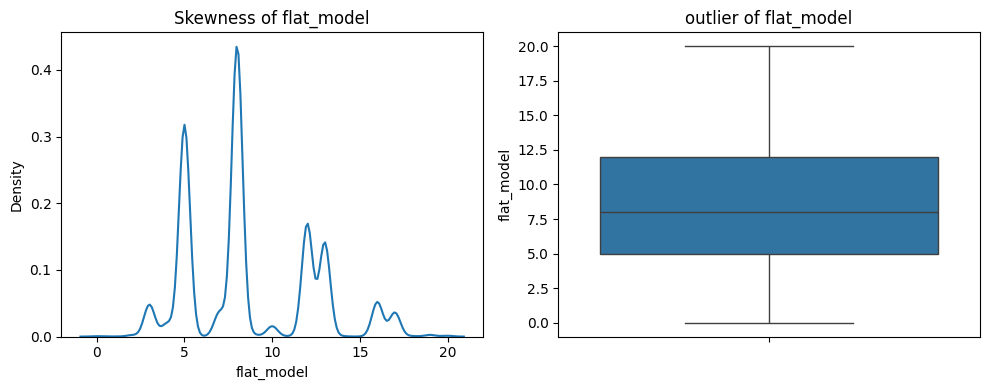

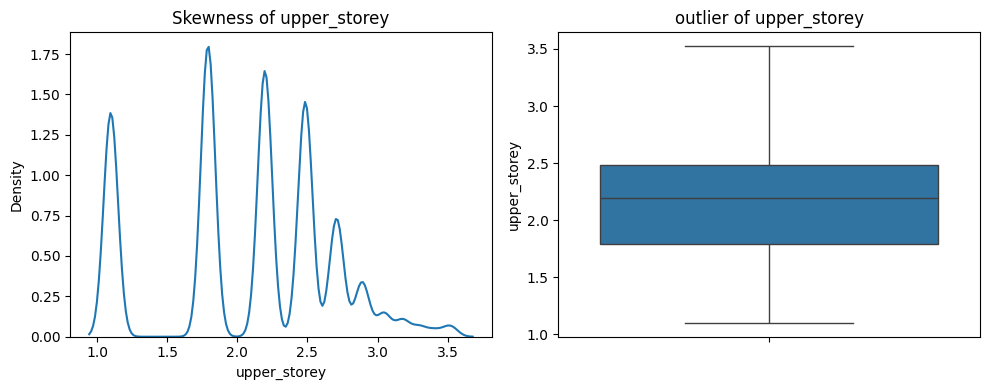

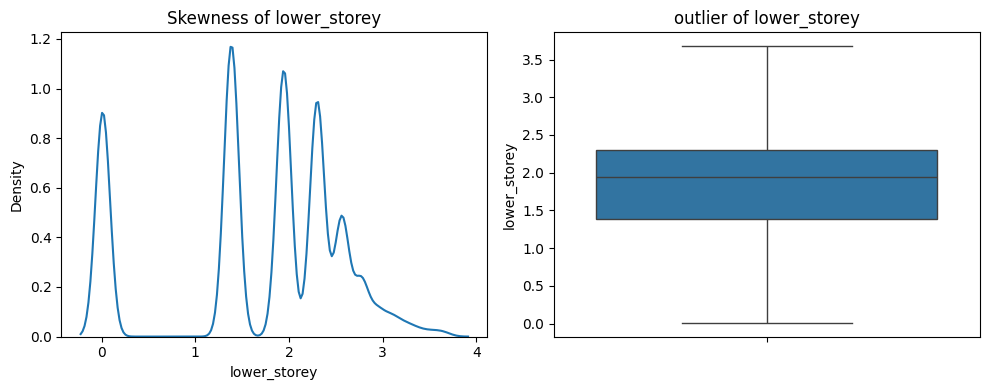

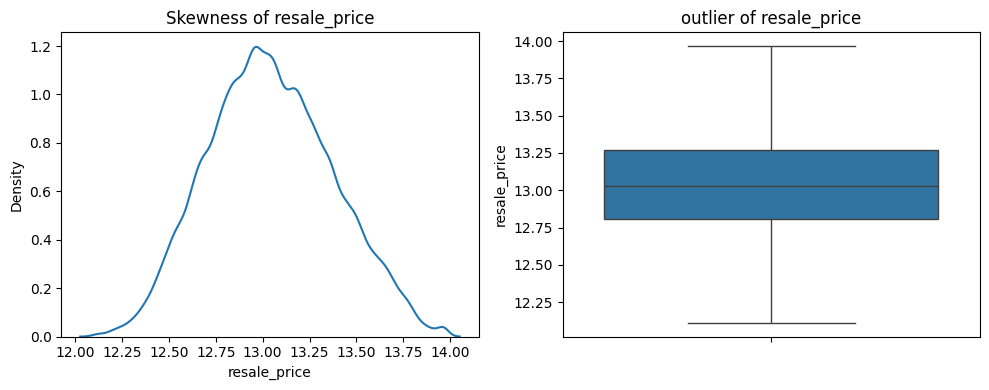

In [137]:
for i in outlier_columns:
  out_skew(data,i)

In [138]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,220405.0,2019.650498,2.706028,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
month,220405.0,6.493659,3.388952,1.000000,4.000000,6.000000,9.000000,12.000000
town,220405.0,13.889449,7.956797,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,220405.0,3.120147,0.919303,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,220405.0,97.040212,23.823411,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,220405.0,8.689599,3.644503,0.000000,5.000000,8.000000,12.000000,20.000000
upper_storey,220405.0,2.093717,0.601208,1.098612,1.791759,2.197225,2.484907,3.524627
lower_storey,220405.0,1.696126,0.920691,0.011858,1.386294,1.945910,2.302585,3.677021
remaining_year,220405.0,74.093895,13.501363,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_month,220405.0,4.610431,3.779953,0.000000,1.000000,4.000000,8.000000,11.000000


In [139]:
np.exp(13.965480)

1161798.7399814494

In [140]:
np.exp(13.043336)

462007.3134883752

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV

In [142]:
X = data[['year','town', 'flat_type', 'floor_area_sqm', 'flat_model', 
       'upper_storey', 'lower_storey', 'remaining_year','remaining_month']]
y = data[['resale_price']]

In [143]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
X_train.shape,X_test.shape

((154283, 9), (66122, 9))

In [145]:
lin_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gr_model = GradientBoostingRegressor()

In [146]:
lin_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gr_model.fit(X_train, y_train)

lin_preds= lin_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gr_preds = gr_model.predict(X_test)

In [147]:
lin_mse = mean_squared_error(y_test, lin_preds)
lin_mae = mean_absolute_error(y_test, lin_preds)
lin_r2 = r2_score(y_test, lin_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

gr_mse = mean_squared_error(y_test, gr_preds)
gr_mae = mean_absolute_error(y_test, gr_preds)
gr_r2 = r2_score(y_test, gr_preds)

In [148]:
print("LinearRegression = MSE:",lin_mse,",MAE :",lin_mae,",R2 :",lin_r2)
print("DecisionTreeRegressor = MSE:",dt_mse,",MAE :",dt_mae,",R2 :",dt_r2)
print("RandomForestRegressor = MSE:",rf_mse,",MAE :",rf_mae,",R2 :",rf_r2)
print("GradientBoostingRegressor = MSE:",gr_mse,",MAE :",gr_mae,",R2 :",gr_r2)

LinearRegression = MSE: 0.036193867558712116 ,MAE : 0.1490149732952586 ,R2 : 0.6721947930568525
DecisionTreeRegressor = MSE: 0.009205519359748063 ,MAE : 0.0681550771987822 ,R2 : 0.9166262855483372
RandomForestRegressor = MSE: 0.005660120934789299 ,MAE : 0.05491496676724439 ,R2 : 0.9487366993499087
GradientBoostingRegressor = MSE: 0.015151135671697713 ,MAE : 0.09296571843841532 ,R2 : 0.8627772741824858


The Random Forest Regressor stands out as the best model among the ones you evaluated. It has the lowest MSE and MAE, and the highest R² score, indicating it provides the best fit for the data with the least error

In [149]:
RFR = RandomForestRegressor()

RFR= RandomForestRegressor(n_estimators= 50 ,random_state = 0)

# fitting the model: 

RFR.fit(X_train,y_train)

y_pred_train = RFR.predict(X_train)
y_pred_test = RFR.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)


print("Training data r2_score",r2_train)
print("Testing data r2_score",r2_test)

Training data r2_score 0.9895544022958148
Testing data r2_score 0.9482340002177129


In [60]:
param = {
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['log2']
}
grid_searchcv = GridSearchCV(RandomForestRegressor(),param_grid = param,  cv = 5)
grid_searchcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'max_features': ['log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5]})

In [61]:
best_params = grid_searchcv.best_params_
print("Best parameters found: ", best_params)

best_estimator = grid_searchcv.best_estimator_
print("Best estimator found: ", best_estimator)

best_score = grid_searchcv.best_score_
print("Best cross-validation score: ", best_score)

Best parameters found:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best estimator found:  RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5)
Best cross-validation score:  0.8349132952236463


In [62]:
param = {
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['log2']
}
grid_searchcv = GridSearchCV(RandomForestRegressor(),param_grid = param,  cv = 5)
grid_searchcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20], 'max_features': ['log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5]})

In [63]:
best_params = grid_searchcv.best_params_
print("Best parameters found: ", best_params)

best_estimator = grid_searchcv.best_estimator_
print("Best estimator found: ", best_estimator)

best_score = grid_searchcv.best_score_
print("Best cross-validation score: ", best_score)

Best parameters found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best estimator found:  RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5)
Best cross-validation score:  0.9209207623178892


In [65]:
param = {
    'max_depth': [30],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['log2']
}
grid_searchcv = GridSearchCV(RandomForestRegressor(),param_grid = param,  cv = 5)
grid_searchcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30], 'max_features': ['log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5]})

In [66]:
best_params = grid_searchcv.best_params_
print("Best parameters found: ", best_params)

best_estimator = grid_searchcv.best_estimator_
print("Best estimator found: ", best_estimator)

best_score = grid_searchcv.best_score_
print("Best cross-validation score: ", best_score)

Best parameters found:  {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best estimator found:  RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5)
Best cross-validation score:  0.927381357032847


By choosing Best parameters found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}

In [150]:
RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(n_estimators=50,max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 

Hyper_model.fit(X_train,y_train)

y_pred_train = Hyper_model.predict(X_train)
y_pred_test = Hyper_model.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

print("Training data r2_score",r2_train)
print("Testing data r2_score",r2_test)

Training data r2_score 0.9506952994385844
Testing data r2_score 0.9238650639360914


In [151]:
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('r2 score:',r2_score(y_test,y_pred_test))

Mean Squared Error: 0.008406266081569719
Mean Absolute Error: 0.0666793717629374
r2 score: 0.9238650639360914


In [152]:
data.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,upper_storey,lower_storey,remaining_year,remaining_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,2.197225,1.945910,70,0,1986,12.449019
1,2015,1,0,2.0,68.0,12.0,1.098612,0.011858,65,0,1981,12.524526
2,2015,1,0,2.0,69.0,12.0,1.098612,0.011858,64,0,1980,12.560244
3,2015,1,0,2.0,68.0,12.0,1.098612,0.011858,63,0,1979,12.577636
4,2015,1,0,2.0,68.0,12.0,2.197225,1.945910,64,0,1980,12.577636


In [153]:
round(np.exp(12.524526))

275000

In [154]:
user_data = np.array([[2015,0,2,60,5,1.945910,2.197225,70,0]])
y_prediction = rf_model.predict(user_data)

In [157]:
y_prediction

array([12.50918089])

In [158]:
round(np.exp(12.50918089))

270812

In [159]:
user_data = np.array([[2015,0,2,60,5,1.945910,2.197225,70,0]])
y_prediction = Hyper_model.predict(user_data)

In [160]:
y_prediction

array([12.53723247])

In [161]:
round(np.exp(12.53723247))

278516

In [162]:
import pickle

In [163]:
with open("price_prediction1.pkl","wb") as f:
  pickle.dump(Hyper_model,f)